In [19]:
# pip install sympy
import sympy

In [5]:
theta = sympy.symbols('theta')
u = sympy.Function('u')(theta)
G,M,h = sympy.symbols('G M h', positive=True, real=True)

In [6]:
mu = (G*M)
K = mu / (h**2)

In [22]:
ode = sympy.Eq(u.diff(theta,theta) + u, K)

In [23]:
ode

Eq(u(theta) + Derivative(u(theta), (theta, 2)), G*M/h**2)

In [12]:
solution = sympy.dsolve(ode,u)

In [24]:
solution

Eq(u(theta), C1*sin(theta) + C2*cos(theta) + G*M/h**2)

In [25]:
import sympy

# --- Definición de Símbolos ---
theta = sympy.symbols('theta') # Variable independiente (ángulo)
u_func = sympy.Function('u')(theta) # u como función de theta
r_func = sympy.Function('r')(theta) # r como función de theta

# Constantes físicas y de integración
G, M, h = sympy.symbols('G M h', positive=True, real=True) # Constantes físicas
C1, C2 = sympy.symbols('C1 C2', real=True) # Constantes de integración de dsolve

# --- Solución para u(theta) ---
# Esta es la forma general de la solución para u(theta)
# (asumiendo que C1 es el coeficiente de sin y C2 el de cos)
u_rhs = C1*sympy.sin(theta) + C2*sympy.cos(theta) + (G*M)/h**2
u_solution = sympy.Eq(u_func, u_rhs)

print("Solución para u(θ) obtenida previamente:")
sympy.pprint(u_solution, use_unicode=True)
print("-" * 40)

# --- Reemplazo u = 1/r ---
# Expresión para 1/r(θ) es simplemente u_rhs
eq_one_over_r = sympy.Eq(1/r_func, u_rhs)
print("Paso 1: Reemplazar u(θ) por 1/r(θ):")
sympy.pprint(eq_one_over_r, use_unicode=True)
print("-" * 40)

# Expresión para r(θ)
r_expr_intermediate = 1 / u_rhs
eq_r_intermediate = sympy.Eq(r_func, r_expr_intermediate)
print("Paso 2: Despejar r(θ) (forma intermedia):")
sympy.pprint(eq_r_intermediate, use_unicode=True)
print("-" * 40)

# --- Transformación a la forma estándar r = p / (1 + e*cos(θ - θ_0)) ---
# La parte C1*sin(θ) + C2*cos(θ) se puede escribir como A*cos(θ - θ_0).
# Donde A = sqrt(C1^2 + C2^2) es la amplitud,
# y θ_0 es el ángulo de fase.
# Si C1 es el coeficiente de sin(θ) y C2 el de cos(θ),
# entonces A*cos(θ - θ_0) = A*(cos(θ)cos(θ_0) + sin(θ)sin(θ_0))
# Comparando: C2 = A*cos(θ_0) y C1 = A*sin(θ_0).
# Entonces, θ_0 = atan2(C1, C2).

# Definimos A y θ_0 simbólicamente para la transformación.
# A_s representa la constante A de la amplitud.
A_s = sympy.Symbol('A', positive=True, real=True)
theta_0 = sympy.Symbol('theta_0', real=True) # Ángulo de la periapsis

# Sustituimos conceptualmente C1*sin(θ) + C2*cos(θ) por A_s*cos(θ - θ_0) en u_rhs:
u_rhs_transformed_cos = A_s * sympy.cos(theta - theta_0) + (G*M)/h**2
print(f"Paso 3: Reescribir la parte oscilatoria de u(θ) usando A y θ₀:")
print(f"u(θ) = A⋅cos(θ - θ₀) + GM/h²")
print(f"donde A = sqrt(C1² + C2²), y θ₀ se define tal que C2=A⋅cos(θ₀) y C1=A⋅sin(θ₀).")
sympy.pprint(sympy.Eq(u_func, u_rhs_transformed_cos), use_unicode=True)
print("-" * 40)

# La expresión para r(θ) se convierte en:
r_expr_transformed_cos = 1 / u_rhs_transformed_cos
eq_r_transformed_cos = sympy.Eq(r_func, r_expr_transformed_cos)
print("Paso 4: r(θ) con la forma A⋅cos(θ - θ₀):")
sympy.pprint(eq_r_transformed_cos, use_unicode=True)
print("-" * 40)

# Para llegar a la forma estándar r = p / (1 + e*cos(θ - θ_0)), factorizamos GM/h^2 del denominador:
# Denominador = (G*M)/h**2 * ( (A_s * h**2)/(G*M) * cos(θ - θ_0) + 1 )
# Numerador para r(θ) será h**2/(G*M)

# Definimos p (semi-latus rectum) y e (excentricidad) simbólicamente
p_sym = sympy.Symbol('p', positive=True)
e_sym = sympy.Symbol('e', positive=True, real=True) # e >= 0

# Establecemos las relaciones
# p = h^2 / (G*M)
# e = A_s * h^2 / (G*M)
# donde A_s es la amplitud A.

# Mostramos estas definiciones
print("Paso 5: Definir el semi-latus rectum (p) y la excentricidad (e):")
sympy.pprint(sympy.Eq(p_sym, h**2 / (G*M)), use_unicode=True)
sympy.pprint(sympy.Eq(e_sym, A_s * h**2 / (G*M)), use_unicode=True)
print(f"Aquí, A (denotada A_s arriba) es la amplitud de la parte cosenoidal de u(θ).")
print("-" * 40)

# Construimos la forma final estándar de r(θ)
r_standard_form = p_sym / (1 + e_sym * sympy.cos(theta - theta_0))
eq_r_standard = sympy.Eq(r_func, r_standard_form)

print("Paso 6: Expresión final para r(θ) en la forma estándar de una cónica:")
sympy.pprint(eq_r_standard, use_unicode=True)
print("\nExplicación de las constantes:")
print(f"  'p' (semi-latus rectum) = h²/(GM)")
print(f"  'e' (excentricidad) = A⋅h²/(GM)")
print(f"  'A' es la amplitud de la solución homogénea para u(θ). Si u_h(θ) = C1 sin(θ) + C2 cos(θ), entonces A = sqrt(C1² + C2²).")
print(f"  'θ₀' (ángulo de la periapsis) es la fase tal que C2 = A⋅cos(θ₀) y C1 = A⋅sin(θ₀).")
print(f"  Para una órbita elíptica, se requiere 0 ≤ e < 1.")

Solución para u(θ) obtenida previamente:
        2             
       d           G⋅M
u(θ) + ───(u(θ)) = ───
         2          2 
       dθ          h  
----------------------------------------
Paso 1: Reemplazar u(θ) por 1/r(θ):
 1                             G⋅M
──── = C₁⋅sin(θ) + C₂⋅cos(θ) + ───
r(θ)                            2 
                               h  
----------------------------------------
Paso 2: Despejar r(θ) (forma intermedia):
                    1             
r(θ) = ───────────────────────────
                               G⋅M
       C₁⋅sin(θ) + C₂⋅cos(θ) + ───
                                2 
                               h  
----------------------------------------
Paso 3: Reescribir la parte oscilatoria de u(θ) usando A y θ₀:
u(θ) = A⋅cos(θ - θ₀) + GM/h²
donde A = sqrt(C1² + C2²), y θ₀ se define tal que C2=A⋅cos(θ₀) y C1=A⋅sin(θ₀).
                       G⋅M
u(θ) = A⋅cos(θ - θ₀) + ───
                        2 
                       h  
--------------

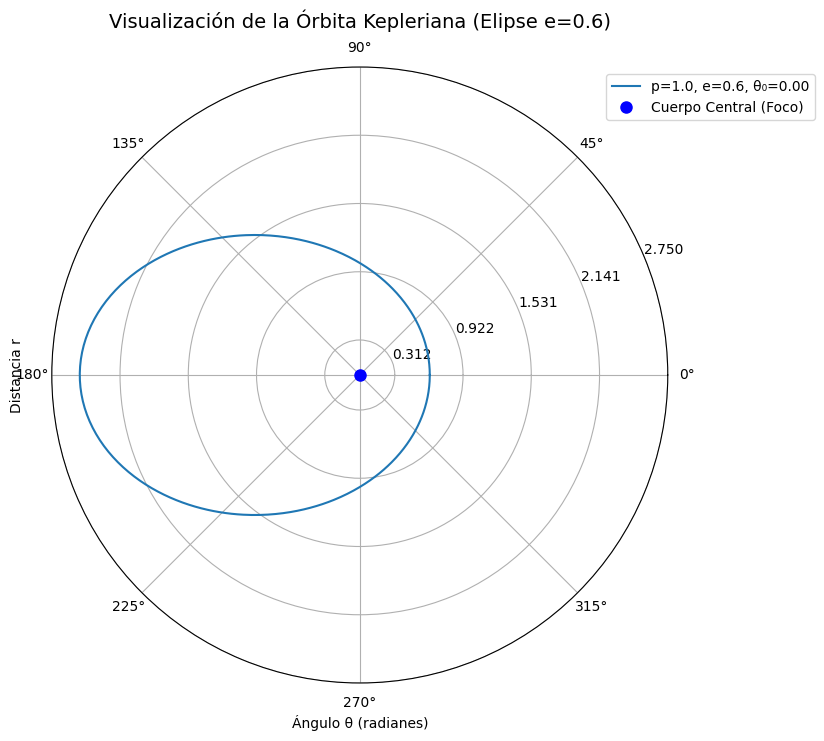

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# --- Parámetros de la Órbita ---
# Puedes cambiar estos valores para ver diferentes órbitas

# p: semi-latus rectum. Determina el tamaño de la órbita.
# (Recuerda que p = h^2 / (G*M))
p_val = 1.0  # Ejemplo: unidades arbitrarias de distancia

# e: excentricidad.
# 0 para un círculo.
# 0 < e < 1 para una elipse.
# e = 1 para una parábola.
# e > 1 para una hipérbola.
e_val = 0.6  # Ejemplo: elipse

# theta_0: ángulo de la periapsis (en radianes).
# Define la orientación de la elipse.
# 0 significa que la periapsis está a lo largo del eje x positivo.
theta_0_val = 0.0 # Ejemplo: np.pi/4 para rotar la elipse 45 grados

# --- Preparación de los datos para graficar ---

# Creamos un array de valores para el ángulo theta
# Para una elipse completa, vamos de 0 a 2*pi radianes.
theta_array = np.linspace(0, 2 * np.pi, 500) # 500 puntos para una curva suave

# Definimos la función para r(theta)
def r_kepler(theta, p, e, theta_0):
    """
    Calcula la distancia r para un ángulo theta dado,
    según la ecuación de la órbita kepleriana.
    """
    numerator = p
    denominator = 1 + e * np.cos(theta)
    return numerator / denominator

# Calculamos los valores de r para cada valor de theta
r_array = r_kepler(theta_array, p_val, e_val, theta_0_val)

# --- Creación del Gráfico ---

# Crear la figura y un subplot polar
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8, 8))

# Graficar los datos (theta, r)
ax.plot(theta_array, r_array, label=f'p={p_val}, e={e_val}, θ₀={theta_0_val:.2f}')

# Colocar el cuerpo central (por ejemplo, la Tierra) en el origen, que es un foco de la elipse.
ax.plot(0, 0, 'o', markersize=8, color='blue', label='Cuerpo Central (Foco)')

# Configuraciones adicionales del gráfico
ax.set_title(f'Visualización de la Órbita Kepleriana (Elipse e={e_val})', va='bottom', fontsize=14)
ax.set_xlabel('Ángulo θ (radianes)') # No es estándar en polar, pero puede ser útil
ax.set_ylabel('Distancia r', labelpad=20) # No es estándar en polar
ax.set_rticks(np.linspace(min(r_array)*0.5, max(r_array)*1.1, 5)) # Ajusta las marcas radiales dinámicamente
ax.grid(True) # Muestra la cuadrícula polar
ax.legend(loc='upper right', bbox_to_anchor=(1.25, 1.0)) # Coloca la leyenda

# Mostrar el gráfico
plt.show()